In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('holidayAnalysis.csv')
df

In [ ]:
df.info()

In [6]:
data_type_roas= df['ROAS'].dtype
data_type_roas

dtype('float64')

In [8]:
df

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Install,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776,12.0,2240,...,0,450,3,652,0,3,Ano novo,sim,NaN,0.000000
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629,19.0,2814,...,1,1611,11,2199,0,12,Outros,não,NaN,0.000000
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952,23.0,3964,...,0,1952,13,2069,0,15,Outros,não,NaN,0.000000
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030,32.0,5442,...,1,1494,15,2823,0,11,Outros,não,NaN,0.000000
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390,39.0,6016,...,0,1328,14,2651,0,10,Outros,não,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524,4715.0,1091789,...,205,413285,7219,1726599,49639,303,Outros,não,3244.640257,0.121686
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,239408,3864.0,889496,...,205,366044,6013,1473600,37051,256,Outros,não,3458.113677,0.107440
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,199808,3314.0,775617,...,140,318505,5020,1219804,19018,191,Outros,não,3450.407047,0.112503
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,184870,2701.0,603360,...,146,261822,4526,1120293,19660,217,Outros,não,2976.175208,0.109661


In [10]:
from scipy import stats

# Converter a coluna de data para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Lista de feriados
feriados = ['2020-05-01',
 '2021-05-01',
 '2022-05-01',
 '2020-12-25',
 '2021-12-25',
 '2022-12-25',
 '2020-12-24',
 '2021-12-24',
 '2022-12-24',
 '2020-11-02',
 '2021-11-02',
 '2022-11-02',
 '2020-06-12',
 '2021-06-12',
 '2022-06-12',
 '2020-11-15',
 '2021-11-15',
 '2022-11-15',
 '2020-12-31',
 '2021-12-31',
 '2022-12-31',
 '2020-01-01',
 '2021-01-01',
 '2022-01-01',
 '2020-10-12',
 '2021-10-12',
 '2022-10-12',
 '2020-04-21',
 '2021-04-21',
 '2022-04-21',
 '2020-09-07',
 '2021-09-07',
 '2022-09-07', 
 '2020-04-10',
 '2021-04-02',
 '2022-04-15',
 '2020-08-09',
 '2021-08-08',
 '2022-08-14',
 '2020-05-10',
 '2021-05-09',
 '2022-05-08',
 '2020-06-11',
 '2021-06-03',
 '2022-06-16']  # substituir por suas datas de feriados

# Criar uma nova coluna para indicar se o dia é feriado ou não
df['Feriado'] = df['Data'].isin(feriados)

# Calcular a média de ROAS e CPV em dias normais e feriados
media_dias_normais = df[df['Feriado'] == False][['ROAS', 'CPV']].mean()
media_feriados = df[df['Feriado'] == True][['ROAS', 'CPV']].mean()

print('Média em dias normais:\n', media_dias_normais)
print('Média em feriados:\n', media_feriados)

# Realizar teste t para comparar as médias
t_test_ROAS = stats.ttest_ind(df[df['Feriado'] == False]['ROAS'], df[df['Feriado'] == True]['ROAS'])
t_test_CPV = stats.ttest_ind(df[df['Feriado'] == False]['CPV'], df[df['Feriado'] == True]['CPV'])

print('Resultado do teste t para ROAS:', t_test_ROAS)
print('Resultado do teste t para CPV:', t_test_CPV)




Média em dias normais:
 ROAS    2727.755531
CPV        5.926688
dtype: float64
Média em feriados:
 ROAS    2715.334286
CPV        0.602390
dtype: float64
Resultado do teste t para ROAS: Ttest_indResult(statistic=nan, pvalue=nan)
Resultado do teste t para CPV: Ttest_indResult(statistic=0.2927653368288274, pvalue=0.769709444622905)


In [ ]:
# df = df.drop('isFeriadoNumeric', axis=1)
# df

In [19]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


In [20]:
from scipy import stats

# Converter a coluna de data para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Lista de feriados
feriados = ['2020-05-01',
 '2021-05-01',
 '2022-05-01',
 '2020-12-25',
 '2021-12-25',
 '2022-12-25',
 '2020-12-24',
 '2021-12-24',
 '2022-12-24',
 '2020-11-02',
 '2021-11-02',
 '2022-11-02',
 '2020-06-12',
 '2021-06-12',
 '2022-06-12',
 '2020-11-15',
 '2021-11-15',
 '2022-11-15',
 '2020-12-31',
 '2021-12-31',
 '2022-12-31',
 '2020-01-01',
 '2021-01-01',
 '2022-01-01',
 '2020-10-12',
 '2021-10-12',
 '2022-10-12',
 '2020-04-21',
 '2021-04-21',
 '2022-04-21',
 '2020-09-07',
 '2021-09-07',
 '2022-09-07', 
 '2020-04-10',
 '2021-04-02',
 '2022-04-15',
 '2020-08-09',
 '2021-08-08',
 '2022-08-14',
 '2020-05-10',
 '2021-05-09',
 '2022-05-08',
 '2020-06-11',
 '2021-06-03',
 '2022-06-16']  # substituir por suas datas de feriados

# Criar uma nova coluna para indicar se o dia é feriado ou não
df['Feriado'] = df['Data'].isin(feriados)

# Calcular a média de ROAS e CPV em dias normais e feriados
media_dias_normais = df[df['Feriado'] == False][['ROAS', 'CPV']].mean()
media_feriados = df[df['Feriado'] == True][['ROAS', 'CPV']].mean()

print('Média em dias normais:\n', media_dias_normais)
print('Média em feriados:\n', media_feriados)

# Realizar teste t para comparar as médias
t_test_ROAS = stats.ttest_ind(df[df['Feriado'] == False]['ROAS'], df[df['Feriado'] == True]['ROAS'])
t_test_CPV = stats.ttest_ind(df[df['Feriado'] == False]['CPV'], df[df['Feriado'] == True]['CPV'])

print('Resultado do teste t para ROAS:', t_test_ROAS)
print('Resultado do teste t para CPV:', t_test_CPV)

Média em dias normais:
 ROAS    1021.181130
CPV        0.480468
dtype: float64
Média em feriados:
 ROAS    1073.572825
CPV        0.459216
dtype: float64
Resultado do teste t para ROAS: Ttest_indResult(statistic=nan, pvalue=nan)
Resultado do teste t para CPV: Ttest_indResult(statistic=0.7316093924957024, pvalue=0.4644293651277419)


In [40]:
# Converter 'isFeriado' para uma representação numérica
df['isFeriado'] = df['isFeriado'].map({'Sim': 1, 'Não': 0})

# # Cria uma máscara booleana para os dias de feriado
# mask = df['isFeriado'] == 1

# # Cria DataFrames para 1 dia antes e 1 dia depois
# before = df[mask.shift(-1, fill_value=False)]
# after = df[mask.shift(1, fill_value=False)]

# # Concatena os dois DataFrames
# new_df = pd.concat([before, after])

# # Remove duplicatas (se houver)
# # new_df = new_df.drop_duplicates()

# # Ordena o novo DataFrame pela data
# new_df = new_df.sort_values(by='Data')
# df

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,Feriado
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.0,12.0,2240.0,...,450.0,3.0,652.0,0.0,3.0,Ano novo,NaN,NaN,0.000000,True
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.0,19.0,2814.0,...,1611.0,11.0,2199.0,0.0,12.0,Outros,NaN,NaN,0.000000,False
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.0,23.0,3964.0,...,1952.0,13.0,2069.0,0.0,15.0,Outros,NaN,NaN,0.000000,False
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.0,32.0,5442.0,...,1494.0,15.0,2823.0,0.0,11.0,Outros,NaN,NaN,0.000000,False
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.0,39.0,6016.0,...,1328.0,14.0,2651.0,0.0,10.0,Outros,NaN,NaN,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.0,4715.0,1091789.0,...,413285.0,7219.0,1726599.0,49639.0,303.0,Outros,NaN,2909.166897,0.121686,False
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,239408.0,3864.0,889496.0,...,366044.0,6013.0,1473600.0,37051.0,256.0,Outros,NaN,2909.166897,0.107440,False
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,199808.0,3314.0,775617.0,...,318505.0,5020.0,1219804.0,19018.0,191.0,Outros,NaN,2909.166897,0.112503,False
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,184870.0,2701.0,603360.0,...,261822.0,4526.0,1120293.0,19660.0,217.0,Outros,NaN,2909.166897,0.109661,False


In [51]:

# Cria uma máscara booleana para os dias de feriado
mask = df['betweenHoliday'] == True
# Cria DataFrames para 1 dia antes e 1 dia depois
before = df[mask.shift(-1, fill_value=False)]
after = df[mask.shift(1, fill_value=False)]

# Concatena os dois DataFrames
new_df = pd.concat([before, after])

# Remove duplicatas (se houver)
new_df = new_df.drop_duplicates()

# Ordena o novo DataFrame pela data
new_df = new_df.sort_values(by='Data')

In [28]:
from scipy.stats import ttest_ind

# Lista de colunas numéricas no seu DataFrame
num_cols = ['Visitas', 'Pedidos', 'Receita', 'Usuarios', 'Novos_Usuarios', 
            'Investimento', 'Install']

# Loop para cada coluna numérica
for col in num_cols:
    
    # Separa os dois grupos de interesse
    group_feriado = df[df['Feriado'] == True][col]
    group_nao_feriado = df[df['Feriado'] == False][col]

    # Realiza o teste t
    # t_stat, p_val = ttest_ind(group_feriado, group_nao_feriado, nan_policy='omit')

    print(f'\nColuna: {col}')
    print(f' Feridado: {group_feriado.mean()}')
    print(f'Nao feriado: {group_nao_feriado.mean()}')




Coluna: Visitas
 Feridado: 198758.85634920635
Nao feriado: 230627.67721217888

Coluna: Pedidos
 Feridado: 2265.5968253968254
Nao feriado: 2797.864075030583

Coluna: Receita
 Feridado: 521339.4908730159
Nao feriado: 631577.3892041593

Coluna: Usuarios
 Feridado: 134783.65158730157
Nao feriado: 156454.4869172217

Coluna: Novos_Usuarios
 Feridado: 40082.49841269841
Nao feriado: 45549.00271849939

Coluna: Investimento
 Feridado: 59091.996825396825
Nao feriado: 72549.86910425445

Coluna: Install
 Feridado: 2126.9031746031746
Nao feriado: 2349.7204193285306


In [54]:
df

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,Feriado,betweenHoliday
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.0,12.0,2240.0,...,3.0,652.0,0.0,3.0,Ano novo,NaN,NaN,0.000000,True,1
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.0,19.0,2814.0,...,11.0,2199.0,0.0,12.0,Outros,NaN,NaN,0.000000,False,0
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.0,23.0,3964.0,...,13.0,2069.0,0.0,15.0,Outros,NaN,NaN,0.000000,False,0
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.0,32.0,5442.0,...,15.0,2823.0,0.0,11.0,Outros,NaN,NaN,0.000000,False,0
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.0,39.0,6016.0,...,14.0,2651.0,0.0,10.0,Outros,NaN,NaN,0.000000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.0,4715.0,1091789.0,...,7219.0,1726599.0,49639.0,303.0,Outros,NaN,2909.166897,0.121686,False,0
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,239408.0,3864.0,889496.0,...,6013.0,1473600.0,37051.0,256.0,Outros,NaN,2909.166897,0.107440,False,0
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,199808.0,3314.0,775617.0,...,5020.0,1219804.0,19018.0,191.0,Outros,NaN,2909.166897,0.112503,False,0
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,184870.0,2701.0,603360.0,...,4526.0,1120293.0,19660.0,217.0,Outros,NaN,2909.166897,0.109661,False,0


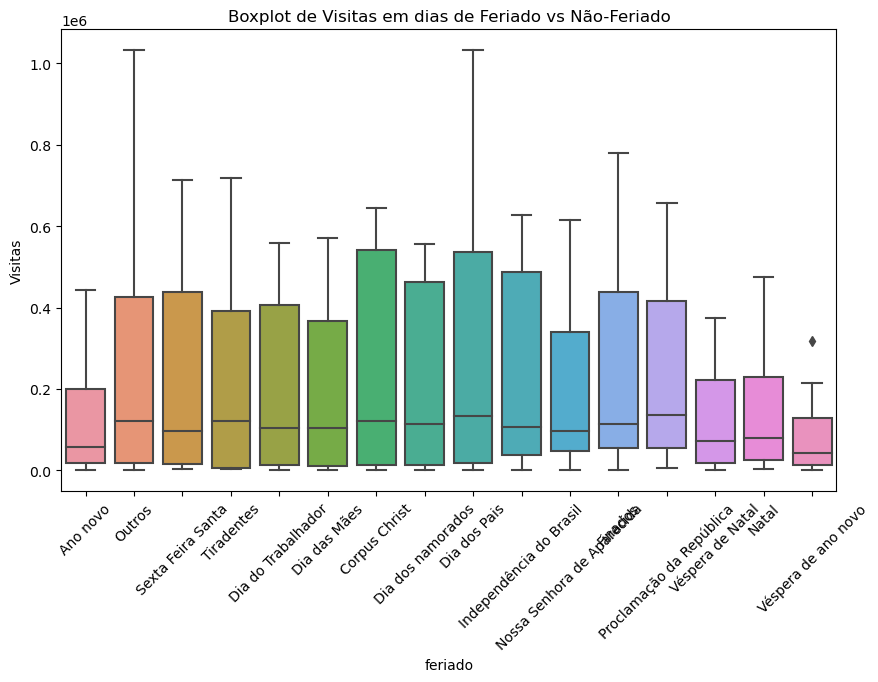

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converta a coluna isFeriado para boolean
# df['isFeriado'] = df['isFeriado'].map({'Yes': True, 'No': False})

# Crie o boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='feriado', y='Visitas', data=df) # ROAS, Receita, CPV, 
plt.xticks(rotation=45)
plt.title('Boxplot de Visitas em dias de Feriado vs Não-Feriado')
plt.show()


<Axes: xlabel='isFeriado', ylabel='Receita'>

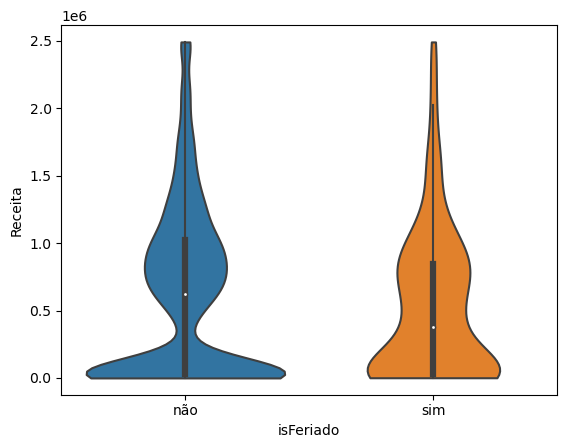

In [242]:
sns.violinplot(data=df_concatenado, x="isFeriado", y="Receita", cut=0)#, scale="count")

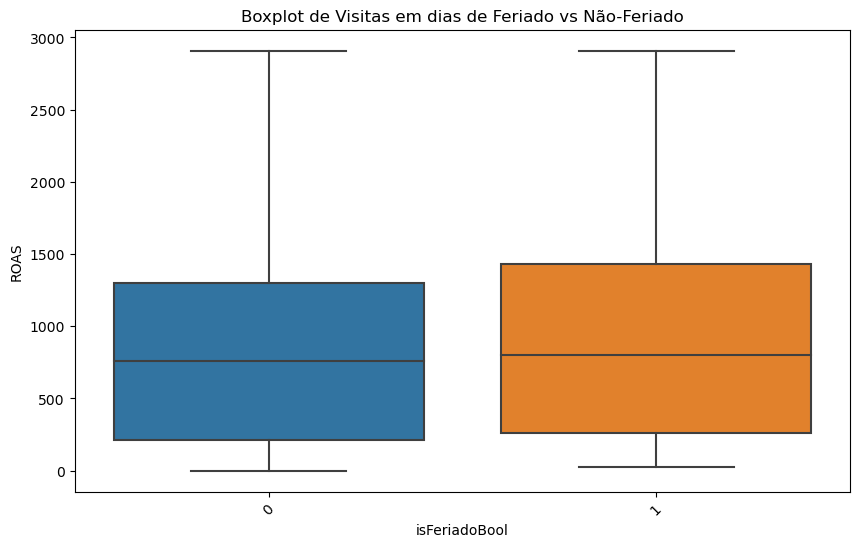

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converta a coluna isFeriado para boolean
# df['isFeriado'] = df['isFeriado'].map({'Yes': True, 'No': False})

# df_concatenado = df_concatenado.sort_values('CPV', ascending=False)
# Crie o boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='isFeriadoBool', y='ROAS', data=df_concatenado) # ROAS, Receita, CPV, 
plt.xticks(rotation=45)
plt.title('Boxplot de Visitas em dias de Feriado vs Não-Feriado')
plt.show()




In [ ]:
import pandas as pd
import numpy as np

# Carregar os dados
dados = pd.read_csv("seu_arquivo.csv")

# Definir as colunas relevantes para identificar os outliers
colunas_metricas = ["Visitas", "Pedidos", "Receita"]

# Definir o número de desvios padrão para considerar um valor como outlier
num_desvios_padrao = 3

# Agrupar os dados por canal
dados_agrupados = dados.groupby("Canal")

# Iterar sobre os grupos de dados por canal
for canal, grupo in dados_agrupados:
    # Calcular a média e o desvio padrão das métricas para o canal atual
    media = grupo[colunas_metricas].mean()
    desvio_padrao = grupo[colunas_metricas].std()
    
    # Filtrar os outliers para cada métrica
    for coluna in colunas_metricas:
        limite_superior = media[coluna] + num_desvios_padrao * desvio_padrao[coluna]
        grupo = grupo[grupo[coluna] <= limite_superior]
    
    # Exibir os dados filtrados para o canal atual
    print(f"Canal: {canal}")
    print(grupo)

# Se preferir, você pode juntar todos os grupos filtrados em um único DataFrame
dados_filtrados = pd.concat([grupo for canal, grupo in dados_agrupados])


In [66]:
newDf = pd.read_csv('holidayAnalysis.csv')
removeOutliersRigthWay = new_df


,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,Feriado,betweenHoliday
2192,2020-01-01,Pagos,App Install,01/2020,2020,jan.,Q1/2020,7106.0,61.0,10675.0,...,36.0,7078.0,2959.0,2035.0,Ano novo,NaN,358.823529,0.418660,True,1
6576,2020-01-01,Pagos,Links - No Brand,01/2020,2020,jan.,Q1/2020,200959.0,1801.0,372064.0,...,960.0,247663.0,25921.0,39.0,Ano novo,NaN,1118.115158,0.165586,True,1
3288,2020-01-01,Pagos,Retargeting,01/2020,2020,jan.,Q1/2020,222636.0,1738.0,301919.0,...,1146.0,258361.0,29297.0,661.0,Ano novo,NaN,1189.266160,0.114029,True,1
4384,2020-01-01,Orgânicos,Links - Brand,01/2020,2020,jan.,Q1/2020,66110.0,1263.0,279033.0,...,1001.0,258102.0,1289.0,122.0,Ano novo,NaN,2909.166897,0.029390,True,1
5480,2020-01-01,Pagos,Display & Video,01/2020,2020,jan.,Q1/2020,153467.0,168.0,30971.0,...,72.0,13937.0,5193.0,377.0,Ano novo,NaN,596.398999,0.033838,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,2022-12-31,Orgânicos,Links - Brand,53/2022,2022,dez.,Q4/2022,46099.0,1113.0,331325.0,...,2187.0,594716.0,5084.0,68.0,Véspera de ano novo,NaN,2909.166897,0.061693,True,1
2191,2022-12-31,Pagos,Afiliados,53/2022,2022,dez.,Q4/2022,36556.0,1107.0,308703.0,...,1878.0,559535.0,50867.0,0.0,Véspera de ano novo,NaN,1140.008863,0.740754,True,1
1095,2022-12-31,Orgânicos,Social,53/2022,2022,dez.,Q4/2022,5570.0,27.0,6168.0,...,77.0,17170.0,1558.0,0.0,Véspera de ano novo,NaN,456.213018,0.242729,True,1
6575,2022-12-31,Pagos,Display & Video,53/2022,2022,dez.,Q4/2022,116276.0,102.0,23462.0,...,249.0,51278.0,26110.0,146.0,Véspera de ano novo,NaN,276.870427,0.072878,True,1


In [152]:
# removeOutliersRigthWay.tail(50)

In [246]:
import pandas as pd
clean = pd.read_csv('holyday_anaysis_clean.csv')
columns = clean
columns

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Usuarios_Antigos,Investimento,Install,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776,12.00,2240,...,373,0,0,450,3,652,0,3,Ano novo,sim
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629,19.00,2814,...,800,0,1,1611,11,2199,0,12,Outros,não
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952,23.00,3964,...,830,0,0,1952,13,2069,0,15,Outros,não
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030,32.00,5442,...,879,0,1,1494,15,2823,0,11,Outros,não
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390,39.00,6016,...,1043,0,0,1328,14,2651,0,10,Outros,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524,4715.00,1091789,...,149206,33649,205,413285,7219,1726599,49639,303,Outros,não
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,239408,3864.00,889496,...,127790,25722,205,366044,6013,1473600,37051,256,Outros,não
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,199808,3314.00,775617,...,107905,22479,140,318505,5020,1219804,19018,191,Outros,não
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,184870,2701.00,603360,...,99781,20273,146,261822,4526,1120293,19660,217,Outros,não


In [247]:
columns["ROAS"] = (columns["Receita"]/columns["Investimento"])
columns["CPV"] = columns["Investimento"]/columns["Visitas"]
columns

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Install,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776,12.00,2240,...,0,450,3,652,0,3,Ano novo,sim,inf,0.00
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629,19.00,2814,...,1,1611,11,2199,0,12,Outros,não,inf,0.00
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952,23.00,3964,...,0,1952,13,2069,0,15,Outros,não,inf,0.00
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030,32.00,5442,...,1,1494,15,2823,0,11,Outros,não,inf,0.00
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390,39.00,6016,...,0,1328,14,2651,0,10,Outros,não,inf,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524,4715.00,1091789,...,205,413285,7219,1726599,49639,303,Outros,não,32.45,0.12
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,239408,3864.00,889496,...,205,366044,6013,1473600,37051,256,Outros,não,34.58,0.11
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,199808,3314.00,775617,...,140,318505,5020,1219804,19018,191,Outros,não,34.50,0.11
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,184870,2701.00,603360,...,146,261822,4526,1120293,19660,217,Outros,não,29.76,0.11


In [251]:
# Substituir valores infinitos por um valor específico (por exemplo, NaN)
columns = columns.replace([float('inf'), float('-inf')], float('nan'))


In [252]:
df_concatenado = columns #pd.concat([columns, df[["ROAS", "CPV"]]], axis=1)

In [263]:
df_concatenado

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Install,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776,12.00,2240,...,0,450,3,652,0,3,Ano novo,sim,NaN,0.00
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629,19.00,2814,...,1,1611,11,2199,0,12,Outros,não,NaN,0.00
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952,23.00,3964,...,0,1952,13,2069,0,15,Outros,não,NaN,0.00
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030,32.00,5442,...,1,1494,15,2823,0,11,Outros,não,NaN,0.00
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390,39.00,6016,...,0,1328,14,2651,0,10,Outros,não,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524,4715.00,1091789,...,205,413285,7219,1726599,49639,303,Outros,não,32.45,0.12
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,239408,3864.00,889496,...,205,366044,6013,1473600,37051,256,Outros,não,34.58,0.11
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,199808,3314.00,775617,...,140,318505,5020,1219804,19018,191,Outros,não,34.50,0.11
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,184870,2701.00,603360,...,146,261822,4526,1120293,19660,217,Outros,não,29.76,0.11


In [264]:
# # Lista das colunas numéricas
# outliersWithout = df_concatenado_concatenado
# for col in outliersWithout.columns:
#     if outliersWithout[col].dtype in ['int64', 'float64']:
#         Q1 = outliersWithout[col].quantile(0.25)
#         Q3 = outliersWithout[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         outliersWithout[col] = outliersWithout[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
# outliersWithout

# Lista das colunas numéricas

# Lista das colunas numéricas
num_cols = ['Visitas', 'Pedidos', 'Receita', 'Usuarios', 'Novos_Usuarios', 'Usuarios_Antigos', 'Investimento', 
            'Install', 'Meta_Visitas', 'Meta_Pedidos', 'Meta__Receita', 'Meta_Investimento', 'Meta_Install', 
            'ROAS', 'CPV']

for canal, sub_df in df_concatenado.groupby('Canal'):
    for col in num_cols:
        Q1 = sub_df[col].quantile(0.25)
        Q3 = sub_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_lower = sub_df[col] < lower_bound
        outliers_upper = sub_df[col] > upper_bound

        lower_bound_value = sub_df[col].quantile(0.01)
        upper_bound_value = sub_df[col].quantile(0.99)
        
        # Substituir os outliers nos dados originais
        df_concatenado.loc[(df_concatenado['Canal'] == canal) & (df_concatenado[col] < lower_bound), col] = lower_bound_value
        df_concatenado.loc[(df_concatenado['Canal'] == canal) & (df_concatenado[col] > upper_bound), col] = upper_bound_value


In [267]:
df_concatenado['isFeriadoBool'] = df_concatenado['isFeriado'].map({'sim': 1, 'não': 0})

In [268]:
df_concatenado

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,isFeriadoBool
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.00,12.00,2240.00,...,450.00,3.00,652.00,0.00,3.00,Ano novo,sim,NaN,0.00,1
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.00,19.00,2814.00,...,1611.00,11.00,2199.00,0.00,105.00,Outros,não,NaN,0.00,0
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.00,23.00,3964.00,...,1952.00,13.00,2069.00,0.00,105.00,Outros,não,NaN,0.00,0
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.00,32.00,5442.00,...,1494.00,15.00,2823.00,0.00,105.00,Outros,não,NaN,0.00,0
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.00,39.00,6016.00,...,1328.00,14.00,2651.00,0.00,105.00,Outros,não,NaN,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.00,4715.00,1091789.00,...,413285.00,7219.00,1726599.00,49639.00,303.00,Outros,não,17.62,0.20,0
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.60,3864.00,889496.00,...,366044.00,6013.00,1473600.00,44268.50,256.00,Outros,não,17.62,0.20,0
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.60,3314.00,775617.00,...,318505.00,5020.00,1219804.00,44268.50,191.00,Outros,não,17.62,0.20,0
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.60,2701.00,603360.00,...,261822.00,4526.00,1120293.00,44268.50,217.00,Outros,não,17.62,0.20,0


In [266]:
dfdf = columns[["ROAS", "Investimento"]]
dfdf.describe()


,ROAS,Investimento
count,7200.00,7672.00
mean,27.66,78077.80
std,51.57,91997.80
min,0.00,0.00
25%,2.11,7930.50
50%,7.58,38920.50
75%,13.00,127041.00
max,279.91,466772.80


In [260]:

# Selecionar apenas as linhas onde 'isFeriadoBool' é 1 (ou seja, é um feriado)
# df_selected_coluns = df_concatenado[["Visitas","Mes","CPV","Receita"]]
# # df_feriado = df_selected_coluns[df_selected_coluns['isFeriado'] == "sim"]
# # df_mes = df_concatenado[df_concatenado['Mes'] == "jan."]
# # Agrupar os dados pelo mês e obter a soma/média (ou outra função de agregação) para todas as outras colunas
# df_feriado_grouped = df_concatenado.groupby('Mes').mean()  # Ou df_feriado.groupby('Mês').mean()

# df_feriado_grouped
# # df_feriado_grouped = df_feriado_grouped.reset_index()
# df_feriado_grouped

In [270]:

# Selecionar apenas as linhas onde 'isFeriadoBool' é 1 (ou seja, é um feriado)
df_selected_coluns = df_concatenado[["Visitas","Mes","CPV","Receita","isFeriadoBool"]]
df_nao_feriado = df_selected_coluns[df_selected_coluns['isFeriadoBool'] == 0] 

# df_mes = df_concatenado[df_concatenado['Mes'] == "jan."]
# Agrupar os dados pelo mês e obter a soma/média (ou outra função de agregação) para todas as outras colunas
df_nao_feriado_grouped = df_nao_feriado.groupby('Mes').mean()  # Ou df_feriado.groupby('Mês').mean()

df_nao_feriado_grouped = df_nao_feriado_grouped.reset_index()

In [225]:
df_concatenado.ROAS = df_concatenado.Investimento/df_concatenado.Receita

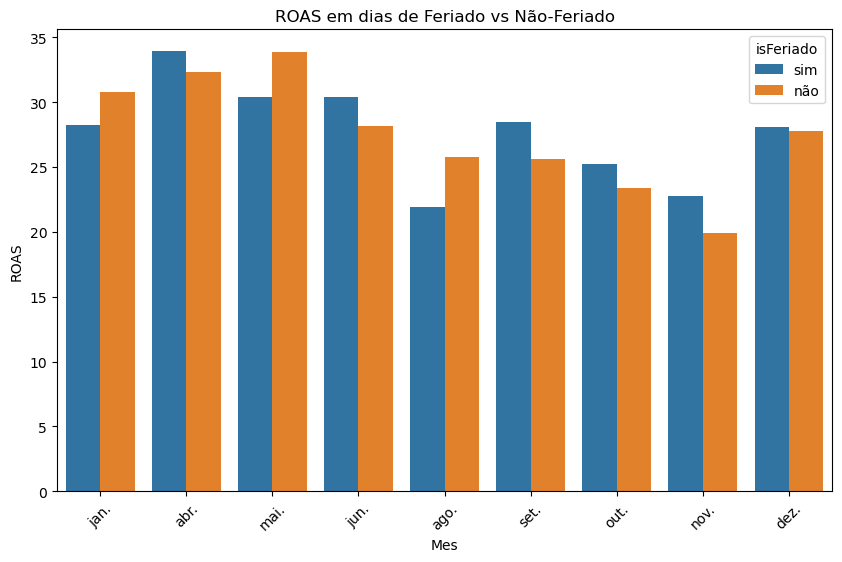

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt
# df_nao_feriado_grouped['Mes'] = df_nao_feriado_grouped['Mes'].astype(str)

# Converta a coluna isFeriado para boolean
# df['isFeriado'] = df['isFeriado'].map({'Yes': True, 'No': False})

# df_concatenado = df_concatenado.sort_values('CPV', ascending=False)
# Crie o boxplot
df_filtered = df_concatenado[~df_concatenado['Mes'].isin([ "fev.", "mar.", "jul."])]
# df_filtered["ROAS"] = df_concatenado["ROAS"]/100
plt.figure(figsize=(10,6))
sns.barplot(x="Mes", y="ROAS", hue="isFeriado", data=df_filtered, errorbar=None)
plt.xticks(rotation=45)
plt.title('ROAS em dias de Feriado vs Não-Feriado')
plt.show()



In [351]:
df_cleaned =df_concatenado[["Data","Agrupamento","Canal", "Ano","Visitas","Pedidos","Receita","Investimento","feriado","isFeriado","ROAS","CPV","isFeriadoBool"]]
mascara = df_cleaned['ROAS'] > 100 #df_cleaned['Agrupamento'] != "Orgânicos" 
# Filtrando os valores acima do valor limite
valores_acima_limite = df_cleaned[mascara]['ROAS']

# Imprimindo os valores acima do valor limite
valores_acima_limite.count()
acima = df_cleaned[mascara]['ROAS'] >100
df_cleaned[mascara]

,Data,Agrupamento,Canal,Ano,Visitas,Pedidos,Receita,Investimento,feriado,isFeriado,ROAS,CPV,isFeriadoBool
4384,2020-01-01,Orgânicos,Links - Brand,2020,66110.00,1263.00,279033.00,1943.00,Ano novo,sim,143.61,0.03,1
4385,2020-01-02,Orgânicos,Links - Brand,2020,118034.00,2447.00,528621.00,3211.00,Outros,não,164.63,0.03,0
4386,2020-01-03,Orgânicos,Links - Brand,2020,117533.00,2748.00,611863.00,3103.00,Outros,não,197.18,0.03,0
4387,2020-01-04,Orgânicos,Links - Brand,2020,103780.00,2561.00,544761.00,2880.00,Outros,não,189.15,0.03,0
4388,2020-01-05,Orgânicos,Links - Brand,2020,104876.00,2725.00,588368.00,2964.00,Outros,não,198.50,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,2022-12-27,Orgânicos,Links - Brand,2022,107332.00,2814.00,727372.00,6092.00,Outros,não,119.40,0.06,0
5476,2022-12-28,Orgânicos,Links - Brand,2022,95689.00,2583.00,703093.00,5052.00,Outros,não,139.17,0.05,0
5477,2022-12-29,Orgânicos,Links - Brand,2022,82380.00,2085.00,591035.00,4125.00,Outros,não,143.28,0.05,0
5478,2022-12-30,Orgânicos,Links - Brand,2022,72173.00,1848.00,505592.00,4173.00,Outros,não,121.16,0.06,0


C:\Users\User\AppData\Local\Temp\ipykernel_16968\3366912647.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="feriado", y="CPV", hue= "isFeriado",data=df_concatenado, ci=None)


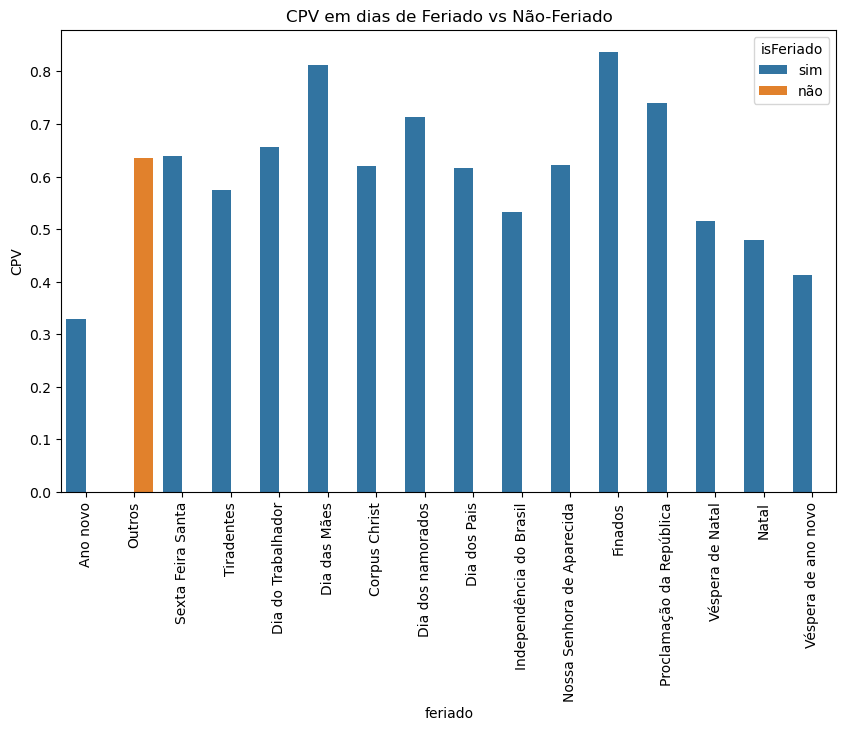

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
# df_nao_feriado_grouped['Mes'] = df_nao_feriado_grouped['Mes'].astype(str)

# Converta a coluna isFeriado para boolean
# df['isFeriado'] = df['isFeriado'].map({'Yes': True, 'No': False})

# df_concatenado = df_concatenado.sort_values('CPV', ascending=False)
# Crie o boxplot
plt.figure(figsize=(10,6))
# sns.barplot(x='Mes', y='Receita', data=df_nao_feriado_grouped) # ROAS, Receita, CPV, 
sns.barplot(x="feriado", y="CPV", hue= "isFeriado",data=df_concatenado, ci=None)
plt.xticks(rotation=90)
plt.title('CPV em dias de Feriado vs Não-Feriado')
plt.show()


In [218]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               7672 non-null   object 
 1   Agrupamento        7672 non-null   object 
 2   Canal              7672 non-null   object 
 3   Semana             7672 non-null   object 
 4   Ano                7672 non-null   int64  
 5   Mes                7672 non-null   object 
 6   Trimestre          7672 non-null   object 
 7   Visitas            7672 non-null   float64
 8   Pedidos            7672 non-null   float64
 9   Receita            7672 non-null   float64
 10  Usuarios           7672 non-null   float64
 11  Novos_Usuarios     7672 non-null   float64
 12  Usuarios_Antigos   7672 non-null   float64
 13  Investimento       7672 non-null   float64
 14  Install            7672 non-null   float64
 15  Meta_Visitas       7672 non-null   float64
 16  Meta_Pedidos       7672 

In [155]:
df_new = df_concatenado.copy()


# Converter a coluna 'aroundHoliday' para string
df_new['aroundHoliday'] = df_new['aroundHoliday'].map({True: 'entre', False: 'não'})

# Atualizar a coluna 'isFeriado' baseado na coluna 'aroundHoliday'
df_new.loc[df_new['aroundHoliday'] == 'entre', 'isFeriado'] = 'entre'



In [156]:
df_new

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,isFeriadoBool,beforeHoliday,afterHoliday,aroundHoliday
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.0,12.0,2240.0,...,0.0,3.0,Ano novo,sim,NaN,0.000000,1,False,False,não
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.0,19.0,2814.0,...,0.0,105.0,Outros,entre,NaN,0.000000,0,False,True,entre
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.0,23.0,3964.0,...,0.0,105.0,Outros,não,NaN,0.000000,0,False,False,não
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.0,32.0,5442.0,...,0.0,105.0,Outros,não,NaN,0.000000,0,False,False,não
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.0,39.0,6016.0,...,0.0,105.0,Outros,não,NaN,0.000000,0,False,False,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.0,4715.0,1091789.0,...,49639.0,303.0,Outros,não,1761.9399,0.204183,0,False,False,não
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3864.0,889496.0,...,44268.5,256.0,Outros,não,1761.9399,0.204183,0,False,False,não
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3314.0,775617.0,...,44268.5,191.0,Outros,não,1761.9399,0.204183,0,False,False,não
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,2701.0,603360.0,...,44268.5,217.0,Outros,entre,1761.9399,0.204183,0,True,False,entre


In [189]:
df_grouped = df_concatenado.groupby(['aroundHoliday']).agg({'CPV': [ 'mean'], 'Receita': ['mean']}).reset_index()
pd.options.display.float_format = '{:.2f}'.format

# pd.reset_option('^display.', silent=True)


In [149]:
df_grouped.columns = ['_'.join(col).rstrip('_') for col in df_grouped.columns.values]

# Renomeia as colunas
df_grouped = df_grouped.rename(columns={
    'Mes': 'Mes',
    'isFeriado': 'isFeriado',
    'CPV_mean': 'Media_CPV',
    'Receita_mean': 'Media_Receita',
    'Receita_sum': 'Soma_Receita'
    
})

In [151]:
# Arredonda as colunas Media_CPV e Media_Receita para duas casas decimais
# df_grouped['Media_CPV'] = df_grouped['Media_CPV'].round(2)

df_grouped['Media_Receita'] = df_grouped['Media_Receita'].round(2)
df_grouped['Media_Receita'] = 'R$ ' + df_grouped['Media_Receita'].astype(str)
df_grouped = df_grouped.sort_values('Media_Receita', ascending=False)

df_grouped

,aroundHoliday,Media_CPV,Media_Receita
0,False,0.636435,R$ 645018.63
1,True,0.599464,R$ 556535.18


In [14]:
df_concatenado

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Install,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.0,12.0,2240.0,...,0.0,450.0,3.0,652.0,0.0,3.0,Ano novo,sim,NaN,0.000000
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.0,19.0,2814.0,...,156.0,1611.0,11.0,2199.0,0.0,105.0,Outros,não,NaN,0.000000
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.0,23.0,3964.0,...,0.0,1952.0,13.0,2069.0,0.0,105.0,Outros,não,NaN,0.000000
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.0,32.0,5442.0,...,156.0,1494.0,15.0,2823.0,0.0,105.0,Outros,não,NaN,0.000000
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.0,39.0,6016.0,...,0.0,1328.0,14.0,2651.0,0.0,105.0,Outros,não,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.0,4715.0,1091789.0,...,205.0,413285.0,7219.0,1726599.0,49639.0,303.0,Outros,não,1761.9399,0.204183
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3864.0,889496.0,...,205.0,366044.0,6013.0,1473600.0,44268.5,256.0,Outros,não,1761.9399,0.204183
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3314.0,775617.0,...,140.0,318505.0,5020.0,1219804.0,44268.5,191.0,Outros,não,1761.9399,0.204183
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,2701.0,603360.0,...,146.0,261822.0,4526.0,1120293.0,44268.5,217.0,Outros,não,1761.9399,0.204183


In [153]:
# outliers

In [15]:
from scipy.stats import ttest_ind

# Lista de colunas numéricas no seu DataFrame
num_cols = ['Visitas', 'Pedidos', 'Receita', 'Usuarios', 'Novos_Usuarios', 
            'Investimento', 'Install']

# Loop para cada coluna numérica
for col in num_cols:
    
    # Separa os dois grupos de interesse
    group_feriado = df_concatenado[df_concatenado['isFeriado'] == "sim"][col]
    group_nao_feriado = df_concatenado[df_concatenado['isFeriado'] == "não"][col]

    # Realiza o teste t
    # t_stat, p_val = ttest_ind(group_feriado, group_nao_feriado, nan_policy='omit')

    print(f'\nColuna: {col}')
    print(f' Feriado: {group_feriado.mean()}')
    print(f'Nao feriado: {group_nao_feriado.mean()}')



Coluna: Visitas
 Feriado: 200228.94873015877
Nao feriado: 230722.44685333697

Coluna: Pedidos
 Feriado: 2305.3820634920635
Nao feriado: 2837.869695528069

Coluna: Receita
 Feriado: 530941.0338095237
Nao feriado: 642349.9923949979

Coluna: Usuarios
 Feriado: 136612.60523809525
Nao feriado: 156817.8058583662

Coluna: Novos_Usuarios
 Feriado: 41304.5480952381
Nao feriado: 46964.79627565583

Coluna: Investimento
 Feriado: 64205.98999999998
Nao feriado: 78671.74339404647

Coluna: Install
 Feriado: 2860.257619047619
Nao feriado: 3167.3768791627017


In [161]:
# df_concatenado


In [19]:
from scipy import stats

# Converter a coluna de data para o tipo datetime
df_concatenado['Data'] = pd.to_datetime(df_concatenado['Data'])

# Lista de feriados
feriados = ['2020-05-01',
 '2021-05-01',
 '2022-05-01',
 '2020-12-25',
 '2021-12-25',
 '2022-12-25',
 '2020-12-24',
 '2021-12-24',
 '2022-12-24',
 '2020-11-02',
 '2021-11-02',
 '2022-11-02',
 '2020-06-12',
 '2021-06-12',
 '2022-06-12',
 '2020-11-15',
 '2021-11-15',
 '2022-11-15',
 '2020-12-31',
 '2021-12-31',
 '2022-12-31',
 '2020-01-01',
 '2021-01-01',
 '2022-01-01',
 '2020-10-12',
 '2021-10-12',
 '2022-10-12',
 '2020-04-21',
 '2021-04-21',
 '2022-04-21',
 '2020-09-07',
 '2021-09-07',
 '2022-09-07', 
 '2020-04-10',
 '2021-04-02',
 '2022-04-15',
 '2020-08-09',
 '2021-08-08',
 '2022-08-14',
 '2020-05-10',
 '2021-05-09',
 '2022-05-08',
 '2020-06-11',
 '2021-06-03',
 '2022-06-16']  # substituir por suas datas de feriados

# Calcular a média de ROAS e CPV em dias normais e feriados
media_dias_normais = df_concatenado[df_concatenado['isFeriado'] == "não"][['ROAS', 'CPV']].mean()
media_feriados = df_concatenado[df_concatenado['isFeriado'] == "sim"][['ROAS', 'CPV']].mean()

print('Média em dias normais:\n', media_dias_normais)
print('Média em feriados:\n', media_feriados)

# # Realizar teste t para comparar as médias
# t_test_ROAS = stats.ttest_ind(df_concatenado[df_concatenado['Feriado'] == False]['ROAS'], df_concatenado[df_concatenado['Feriado'] == True]['ROAS'])
# t_test_CPV = stats.ttest_ind(df_concatenado[df_concatenado['Feriado'] == False]['CPV'], df_concatenado[df_concatenado['Feriado'] == True]['CPV'])

# print('Resultado do teste t para ROAS:', t_test_ROAS)
# print('Resultado do teste t para CPV:', t_test_CPV)


Média em dias normais:
 ROAS    2764.161141
CPV        0.634547
dtype: float64
Média em feriados:
 ROAS    2820.681348
CPV        0.606816
dtype: float64


In [132]:
df_concatenado["isFeriadoBool"] = df_concatenado["isFeriado"]
df_concatenado

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,isFeriadoBool
2527,2020-12-01,Pagos,App Install,49/2020,2020,dez.,Q4/2020,2.0,163.0,32512.0,...,27793.0,261.00,42032.00,48881.0,7482.5,Outros,não,91.971711,1.531432,não
2948,2022-01-26,Pagos,App Install,05/2022,2022,jan.,Q1/2022,11100.0,119.0,21124.0,...,15527.0,816.25,41024.00,34048.0,7482.5,Outros,não,85.824564,1.531432,não
3198,2022-10-03,Pagos,App Install,41/2022,2022,out.,Q4/2022,11248.0,80.0,13036.0,...,5356.0,50.00,12151.00,16785.0,7482.5,Outros,não,54.377842,1.531432,não
3071,2022-05-29,Pagos,App Install,22/2022,2022,mai.,Q2/2022,11348.0,77.0,15049.0,...,11691.0,132.00,31677.00,28797.0,7482.5,Outros,não,63.704864,1.531432,não
2285,2020-04-03,Pagos,App Install,14/2020,2020,abr.,Q2/2020,11365.0,216.0,36497.0,...,5850.0,200.00,32992.00,44756.0,7482.5,Outros,não,84.634650,1.531432,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,2021-08-24,Orgânicos,Social,35/2021,2021,ago.,Q3/2021,3624.0,36.0,7332.0,...,6288.0,62.00,15420.00,0.0,0.0,Outros,não,NaN,0.000000,não
643,2021-10-05,Orgânicos,Social,41/2021,2021,out.,Q4/2021,3637.0,39.0,8806.0,...,4102.0,86.00,20180.00,0.0,0.0,Outros,não,NaN,0.000000,não
419,2021-02-23,Orgânicos,Social,09/2021,2021,fev.,Q1/2021,3642.0,38.0,7451.0,...,8623.0,54.00,13627.00,3119.0,0.0,Outros,não,NaN,0.000000,não
675,2021-11-06,Orgânicos,Social,45/2021,2021,nov.,Q4/2021,3655.0,41.0,10220.0,...,10789.0,138.00,45336.75,0.0,0.0,Outros,não,NaN,0.000000,não


In [160]:
# df_concatenado

In [17]:
df_concatenado = df_concatenado.sort_index()


In [18]:
df_concatenado

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Visitas,Meta_Pedidos,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,isFeriadoBool
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.0,12.0,2240.0,...,450.0,3.0,652.0,0.0,3.0,Ano novo,sim,NaN,0.000000,1
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.0,19.0,2814.0,...,1611.0,11.0,2199.0,0.0,105.0,Outros,não,NaN,0.000000,0
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.0,23.0,3964.0,...,1952.0,13.0,2069.0,0.0,105.0,Outros,não,NaN,0.000000,0
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.0,32.0,5442.0,...,1494.0,15.0,2823.0,0.0,105.0,Outros,não,NaN,0.000000,0
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.0,39.0,6016.0,...,1328.0,14.0,2651.0,0.0,105.0,Outros,não,NaN,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.0,4715.0,1091789.0,...,413285.0,7219.0,1726599.0,49639.0,303.0,Outros,não,1761.9399,0.204183,0
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3864.0,889496.0,...,366044.0,6013.0,1473600.0,44268.5,256.0,Outros,não,1761.9399,0.204183,0
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3314.0,775617.0,...,318505.0,5020.0,1219804.0,44268.5,191.0,Outros,não,1761.9399,0.204183,0
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,2701.0,603360.0,...,261822.0,4526.0,1120293.0,44268.5,217.0,Outros,não,1761.9399,0.204183,0


In [19]:
mask = df_concatenado['isFeriadoBool'] == 1

# Cria novas máscaras para 1 dia antes e 1 dia depois dos feriados
before_mask = mask.shift(-1, fill_value=False)
# after_mask = mask.shift(1, fill_value=False)

# Cria uma nova coluna no DataFrame original
df_concatenado['beforeHoliday'] = before_mask #| after_mask


In [20]:
mask = df_concatenado['isFeriadoBool'] == 1

# Cria novas máscaras para 1 dia antes e 1 dia depois dos feriados
# before_mask = mask.shift(-1, fill_value=False)
after_mask = mask.shift(1, fill_value=False)

# Cria uma nova coluna no DataFrame original
df_concatenado['afterHoliday'] = after_mask #| after_mask


In [21]:
df_concatenado.head(50)

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta__Receita,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,isFeriadoBool,beforeHoliday,afterHoliday
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.0,12.0,2240.0,...,652.0,0.0,3.0,Ano novo,sim,NaN,0.000000,1,False,False
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.0,19.0,2814.0,...,2199.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,True
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.0,23.0,3964.0,...,2069.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.0,32.0,5442.0,...,2823.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.0,39.0,6016.0,...,2651.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False
5,2020-01-06,Orgânicos,Social,02/2020,2020,jan.,Q1/2020,2189.0,34.0,5927.0,...,2286.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False
6,2020-01-07,Orgânicos,Social,02/2020,2020,jan.,Q1/2020,2144.0,61.0,13582.0,...,3943.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False
7,2020-01-08,Orgânicos,Social,02/2020,2020,jan.,Q1/2020,3611.0,91.0,14023.0,...,2979.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False
8,2020-01-09,Orgânicos,Social,02/2020,2020,jan.,Q1/2020,2569.0,42.0,9716.0,...,3512.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False
9,2020-01-10,Orgânicos,Social,02/2020,2020,jan.,Q1/2020,2419.0,67.0,9754.0,...,2373.0,0.0,105.0,Outros,não,NaN,0.000000,0,False,False


In [22]:
mask = df_concatenado['isFeriadoBool'] == 1

# Cria novas máscaras para 1 dia antes e 1 dia depois dos feriados
before_mask = mask.shift(-1, fill_value=False)
after_mask = mask.shift(1, fill_value=False)

# Cria uma nova coluna no DataFrame original
df_concatenado['aroundHoliday'] = before_mask | after_mask
df_concatenado

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,isFeriadoBool,beforeHoliday,afterHoliday,aroundHoliday
0,2020-01-01,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,776.0,12.0,2240.0,...,0.0,3.0,Ano novo,sim,NaN,0.000000,1,False,False,False
1,2020-01-02,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1629.0,19.0,2814.0,...,0.0,105.0,Outros,não,NaN,0.000000,0,False,True,True
2,2020-01-03,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,1952.0,23.0,3964.0,...,0.0,105.0,Outros,não,NaN,0.000000,0,False,False,False
3,2020-01-04,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2030.0,32.0,5442.0,...,0.0,105.0,Outros,não,NaN,0.000000,0,False,False,False
4,2020-01-05,Orgânicos,Social,01/2020,2020,jan.,Q1/2020,2390.0,39.0,6016.0,...,0.0,105.0,Outros,não,NaN,0.000000,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.0,4715.0,1091789.0,...,49639.0,303.0,Outros,não,1761.9399,0.204183,0,False,False,False
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3864.0,889496.0,...,44268.5,256.0,Outros,não,1761.9399,0.204183,0,False,False,False
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3314.0,775617.0,...,44268.5,191.0,Outros,não,1761.9399,0.204183,0,False,False,False
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,2701.0,603360.0,...,44268.5,217.0,Outros,não,1761.9399,0.204183,0,True,False,True


In [29]:
# df_concatenado = df_concatenado.sort_values(by='Data')
df_concatenado.tail()

,Data,Agrupamento,Canal,Semana,Ano,Mes,Trimestre,Visitas,Pedidos,Receita,...,Meta_Investimento,Meta_Install,feriado,isFeriado,ROAS,CPV,isFeriadoBool,beforeHoliday,afterHoliday,aroundHoliday
7667,2022-12-27,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,276524.0,4715.0,1091789.0,...,49639.0,303.0,Outros,não,1761.9399,0.204183,0,False,False,False
7668,2022-12-28,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3864.0,889496.0,...,44268.5,256.0,Outros,não,1761.9399,0.204183,0,False,False,False
7669,2022-12-29,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,3314.0,775617.0,...,44268.5,191.0,Outros,não,1761.9399,0.204183,0,False,False,False
7670,2022-12-30,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,2701.0,603360.0,...,44268.5,217.0,Outros,não,1761.9399,0.204183,0,True,False,True
7671,2022-12-31,Pagos,Links - No Brand,53/2022,2022,dez.,Q4/2022,230166.6,2682.4,395010.0,...,44291.0,297.0,Véspera de ano novo,sim,1761.9399,0.204183,1,False,False,False


In [168]:
df_concatenado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               7672 non-null   object 
 1   Agrupamento        7672 non-null   object 
 2   Canal              7672 non-null   object 
 3   Semana             7672 non-null   object 
 4   Ano                7672 non-null   int64  
 5   Mes                7672 non-null   object 
 6   Trimestre          7672 non-null   object 
 7   Visitas            7672 non-null   float64
 8   Pedidos            7672 non-null   float64
 9   Receita            7672 non-null   float64
 10  Usuarios           7672 non-null   float64
 11  Novos_Usuarios     7672 non-null   float64
 12  Usuarios_Antigos   7672 non-null   float64
 13  Investimento       7672 non-null   float64
 14  Install            7672 non-null   float64
 15  Meta_Visitas       7672 non-null   float64
 16  Meta_Pedidos       7672 

In [185]:
# import pandas as pd
# from scipy.stats import pearsonr, spearmanr

# num_cols = ['Visitas', 'Pedidos', 'Receita', "CPV", "Investimento"]# "isFeriadoBool", "aroundHoliday"]
# # DataFrame de exemplo
# data = df_concatenado[num_cols]

# # Itera sobre as colunas do DataFrame
# for column1 in data.columns:
#     for column2 in data.columns:
#         if column1 != column2:  # Evita calcular correlação da coluna com ela mesma
#             series1 = data[column1]
#             series2 = data[column2]
            
#             # Calcula a correlação de Pearson
#             pearson_corr, _ = pearsonr(series1, series2)
#             print("Correlação de Pearson entre", column1, "e", column2, ":", pearson_corr)
            
#             # Calcula a correlação de Spearman
#             spearman_corr, _ = spearmanr(series1, series2)
#             print("Correlação de Spearman entre", column1, "e", column2, ":", spearman_corr)
#             print()

df_selected = df_concatenado.loc[df_concatenado['isFeriado'] == 'sim']

pearson_corr, _ = pearsonr(
df_concatenado["Investimento"], df_concatenado["Receita"])
print("Correlação de Pearson entre", column1, "e", column2, ":", pearson_corr)


Correlação de Pearson entre Investimento e Investimento : 0.6379124622510183


In [288]:
# import pandas as pd

# # Dados de exemplo
# data = df_concatenado

# # Calcula a correlação de Spearman
# for col in df_concatenado:
# corr = data['CPV'].corr(data['Receita'], method='spearman')

# print("Correlação de Spearman:", corr)


Correlação de Spearman: 0.07792730320488832


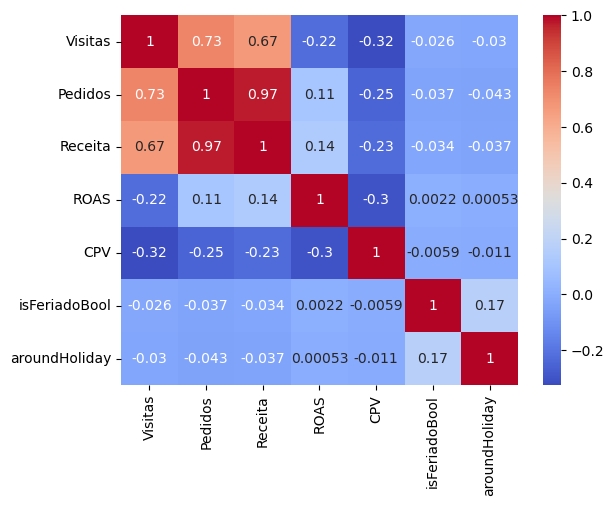

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['Visitas', 'Pedidos', 'Receita', "ROAS", "CPV", "isFeriadoBool", "aroundHoliday"]

data = df_concatenado[num_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [24]:
# Lista de colunas numéricas no seu DataFrame
num_cols = ['Visitas', 'Pedidos', 'Receita', "ROAS", "CPV"]

# Loop para cada coluna numérica
for col in num_cols:
    
    # Separa os dois grupos de interesse
    group_feriado = df_concatenado[df_concatenado['isFeriado'] == "sim"][col]
    group_nao_feriado = df_concatenado[df_concatenado['isFeriado'] == "não"][col]
    group_between_feriado = df_concatenado[df_concatenado["aroundHoliday"] == True][col]
    group_before = df_concatenado[df_concatenado["beforeHoliday"] == True][col]
    group_after = df_concatenado[df_concatenado["afterHoliday"] == True][col]

    # Realiza o teste t
    # t_stat, p_val = ttest_ind(group_feriado, group_nao_feriado, nan_policy='omit')

    print(f'\nColuna: {col}')
    print(f' Feriado: {group_feriado.mean()}')
    print(f'Antes/depois: {group_between_feriado.mean()}')
    print(f'Nao feriado: {group_nao_feriado.mean()}')
    print(f'Antes feriado: {group_before.mean()}')
    print(f'Depois feriado: {group_after.mean()}')





Coluna: Visitas
 Feriado: 200228.94873015877
Antes/depois: 206242.87539808918
Nao feriado: 230722.44685333697
Antes feriado: 198898.78805732483
Depois feriado: 213586.96273885353

Coluna: Pedidos
 Feriado: 2305.3820634920635
Antes/depois: 2403.503582802548
Nao feriado: 2837.869695528069
Antes feriado: 2328.242675159236
Depois feriado: 2478.7644904458602

Coluna: Receita
 Feriado: 530941.0338095237
Antes/depois: 556535.1838375796
Nao feriado: 642349.9923949979
Antes feriado: 539034.9348726115
Depois feriado: 574035.4328025477

Coluna: ROAS
 Feriado: 2820.681348430087
Antes/depois: 2775.610684814516
Nao feriado: 2764.161140745128
Antes feriado: 2769.3947933526038
Depois feriado: 2781.9560740152183

Coluna: CPV
 Feriado: 0.606816145702548
Antes/depois: 0.5994636848444649
Nao feriado: 0.634546998628034
Antes feriado: 0.6122878525622044
Depois feriado: 0.5866395171267254


In [259]:
df_concatenado['feriado'] = df_concatenado['feriado'].astype('string')
df_concatenado['Canal'] = df_concatenado['Canal'].astype('string')

df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7672 entries, 2351 to 0
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               7672 non-null   datetime64[ns]
 1   Agrupamento        7672 non-null   object        
 2   Canal              7672 non-null   string        
 3   Semana             7672 non-null   object        
 4   Ano                7672 non-null   int64         
 5   Mes                7672 non-null   object        
 6   Trimestre          7672 non-null   object        
 7   Visitas            7672 non-null   float64       
 8   Pedidos            7672 non-null   float64       
 9   Receita            7672 non-null   float64       
 10  Usuarios           7672 non-null   float64       
 11  Novos_Usuarios     7672 non-null   float64       
 12  Usuarios_Antigos   7672 non-null   float64       
 13  Investimento       7672 non-null   float64       
 14  Install      

In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Definir as variáveis independentes e a variável dependente
X = df_concatenado[['Visitas', 'Pedidos', 'Usuarios', 'Investimento']]
y = df_concatenado['Receita']

# Definir os modelos a serem testados
models = [
    ('linear regression', LinearRegression()),
    ('decision tree', DecisionTreeRegressor()),
    ('random forest', RandomForestRegressor(n_estimators=100)),
    ('svm', SVR())
]

# Para cada modelo, calcular a pontuação de validação cruzada
for name, model in models:
    score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(f'{name}: {score}')


linear regression: 0.9238667050664005
decision tree: 0.8827307371757114
random forest: 0.9359172460358638
svm: -0.5804591845047572


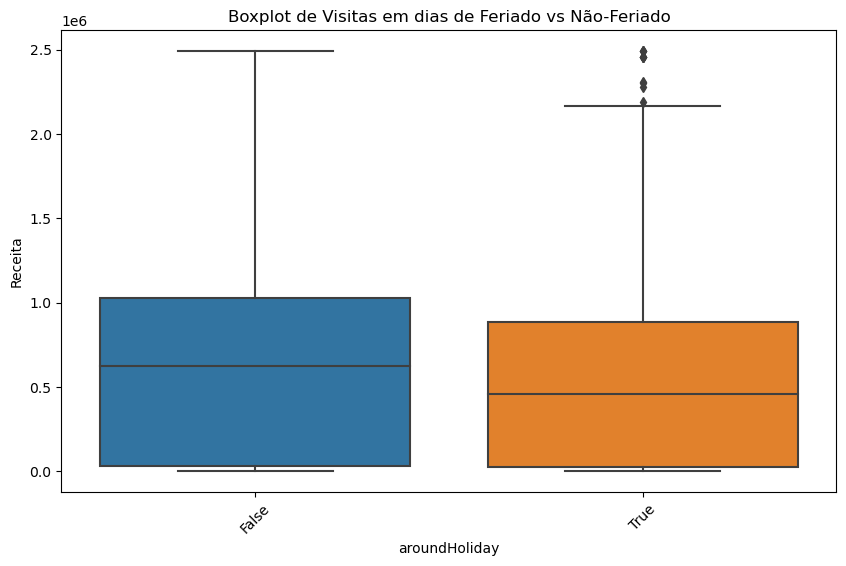

In [184]:

df_more_than1point4 = df_concatenado[df_concatenado["CPV"] <0.8]
df_revenueMoreThan200000= df_concatenado#[df_concatenado["Receita"] <1500000]

# Crie o boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='aroundHoliday', y='Receita', data=df_revenueMoreThan200000) # ROAS, Receita, CPV, 
plt.xticks(rotation=45)
plt.title('Boxplot de Visitas em dias de Feriado vs Não-Feriado')
plt.show()


In [216]:
import statsmodels.api as sm

# Definir as variáveis independentes
X = df[['Visitas', 'ROAS', 'CPV', 'Investimento']]

# Adicionar uma constante à matriz de preditores
X = sm.add_constant(X)

# Definir a variável dependente
y = df['Receita']

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Imprimir um resumo das estatísticas do modelo
print(model.summary())


In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [218]:
y_pred = rf.predict(X_test)


In [219]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')


Test MSE: 162763046174.3923


In [220]:
importances = rf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')


const: 0.0
Visitas: 1.0


In [268]:
import json 
import datetime 
import pandas as pd

def select_top10(data):
    #data = pd.read_csv(maf_file_name, sep="\t", comment="#", low_memory=False)

    top10GenesNames=[]
    variantClassificationType=[]
    for g in data['feriado'].value_counts()[:10].index.tolist():
        # top10GenesNames.append(g)
        for v in data[data["feriado"]==g]["Canal"].value_counts().index.tolist():
            variantClassificationType.append(v)

    variantClassificationType=set(variantClassificationType)
    topGenesVariations_df = pd.DataFrame(index=data['feriado'], columns=variantClassificationType)
    for g in data['feriado'].value_counts()[:10].index.tolist():
        for v in data[data["feriado"]==g]["Canal"].value_counts().items():
            topGenesVariations_df[v[0]][g]=v[1]
    topGenesVariations_df=topGenesVariations_df.append(topGenesVariations_df.agg(['sum']))
    topGenesVariations_df=topGenesVariations_df.sort_values(by ='sum', axis=1,ascending=False)

    bars=[]
    for c in topGenesVariations_df.columns:
        bars.append(list(topGenesVariations_df[c][:10]))
    
    dictionary = {
        "bars": bars,
        "top10GenesNames": top10GenesNames

    }
    result = dictionary
    filename = "static/file_{}.json".format(datetime.datetime.now().isoformat())
    with open(filename, "w+") as f: 
        json.dump(result, f)

    return filename

select_top10(df_concatenado)



ValueError: columns cannot be a set